# **Bounty: Sentiment Analysis with Python Project**
## NLP Project, a sentiment analysis on amazon reviews

For this bounty, I'll be doing a sentiment analysis on a dataset based on amazon reviews using 2 different techniques:

1. NLTK using VADER aka Valence Aware Dictionary and sEntiment Reasoner utulizing the - Bag of words technique (which is the older way approaching sentiment analysis)

2. RoBERTa Pretained Model from Hugging Face, more advanced transformer model from Hugging Face

Here's the link to the dataset used in this sentiment analysis:
https://drive.google.com/drive/folders/1DRni5fuohbQefpOGpRo3gzrcWgUuQYnc?usp=sharing

# NLTK Basics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Style Sheet for matplot
plt.style.use('ggplot')

import nltk

In [47]:
# Read Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/amazon_reviews/Reviews.csv')
print(df.shape)

# Downsizing the amount of data
df = df.head(150)
print(df.shape)

(568454, 10)
(150, 10)


In [48]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## EDA

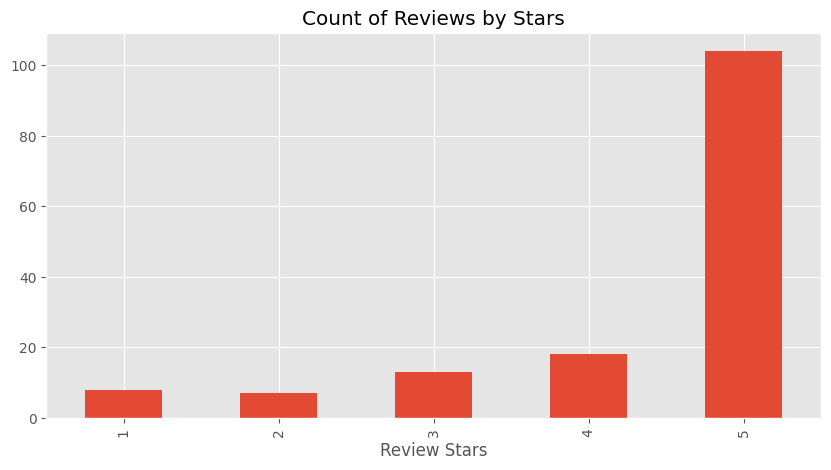

In [49]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

#Basic NLTK

In [51]:
# Example review
example = df['Text'][130]
print(example)

Always being a fan of ramen as a quick and easy meal, finding it on amazon for a decent price and having it delivered to your door by the case is an amazing situation for anyone to find themselves in.


In [53]:
# run 'nltk.download('punkt')' if an error occured when running this block

tokens = nltk.word_tokenize(example)
tokens[:40]

['Always',
 'being',
 'a',
 'fan',
 'of',
 'ramen',
 'as',
 'a',
 'quick',
 'and',
 'easy',
 'meal',
 ',',
 'finding',
 'it',
 'on',
 'amazon',
 'for',
 'a',
 'decent',
 'price',
 'and',
 'having',
 'it',
 'delivered',
 'to',
 'your',
 'door',
 'by',
 'the',
 'case',
 'is',
 'an',
 'amazing',
 'situation',
 'for',
 'anyone',
 'to',
 'find',
 'themselves']

In [54]:
# run 'nltk.download('averaged_perceptron_tagger')' if an error occured when running this block

tagged = nltk.pos_tag(tokens)
tagged[:40]

[('Always', 'NNS'),
 ('being', 'VBG'),
 ('a', 'DT'),
 ('fan', 'NN'),
 ('of', 'IN'),
 ('ramen', 'NNS'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('quick', 'NN'),
 ('and', 'CC'),
 ('easy', 'JJ'),
 ('meal', 'NN'),
 (',', ','),
 ('finding', 'VBG'),
 ('it', 'PRP'),
 ('on', 'IN'),
 ('amazon', 'NN'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('decent', 'JJ'),
 ('price', 'NN'),
 ('and', 'CC'),
 ('having', 'VBG'),
 ('it', 'PRP'),
 ('delivered', 'VBD'),
 ('to', 'TO'),
 ('your', 'PRP$'),
 ('door', 'NN'),
 ('by', 'IN'),
 ('the', 'DT'),
 ('case', 'NN'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('amazing', 'JJ'),
 ('situation', 'NN'),
 ('for', 'IN'),
 ('anyone', 'NN'),
 ('to', 'TO'),
 ('find', 'VB'),
 ('themselves', 'PRP')]

In [55]:
# run 'nltk.download('maxent_ne_chunker')' if an error occured when running this block
# run 'nltk.download('words')' if an error occured when running this block

entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Always/NNS
  being/VBG
  a/DT
  fan/NN
  of/IN
  ramen/NNS
  as/IN
  a/DT
  quick/NN
  and/CC
  easy/JJ
  meal/NN
  ,/,
  finding/VBG
  it/PRP
  on/IN
  amazon/NN
  for/IN
  a/DT
  decent/JJ
  price/NN
  and/CC
  having/VBG
  it/PRP
  delivered/VBD
  to/TO
  your/PRP$
  door/NN
  by/IN
  the/DT
  case/NN
  is/VBZ
  an/DT
  amazing/JJ
  situation/NN
  for/IN
  anyone/NN
  to/TO
  find/VB
  themselves/PRP
  in/IN
  ./.)


## Sentiment Analysis using VADER

using NLTK's `SentimentIntensityAnalyzer` to get the neg/neu/pos scores of the text.

VADER uses the "bag of words" method which does:
1. Removing stop words
2. Each word is scored and combined to a total score.

In [56]:
# run "nltk.download('vader_lexicon')" if an error occured while running this block

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
# Positive review example
sia.polarity_scores('I really love it!')

{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.6989}

In [31]:
# Negative review example
sia.polarity_scores('The customer service was terrible; the representatives were unhelpful and rude.')

{'neg': 0.404, 'neu': 0.596, 'pos': 0.0, 'compound': -0.7269}

In [34]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'compound': 0.9858}

In [35]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/2500 [00:00<?, ?it/s]

In [37]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [38]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Visualize VADER results

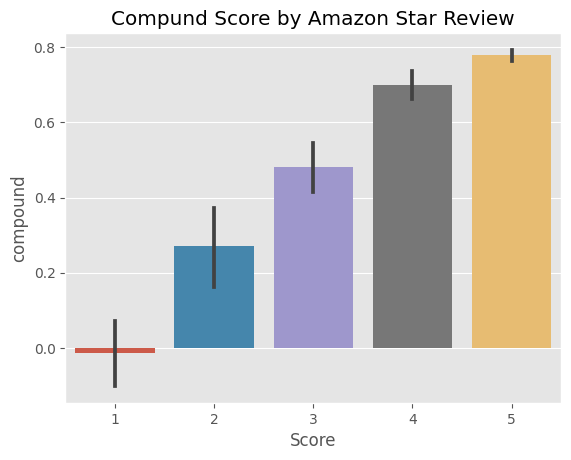

In [39]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

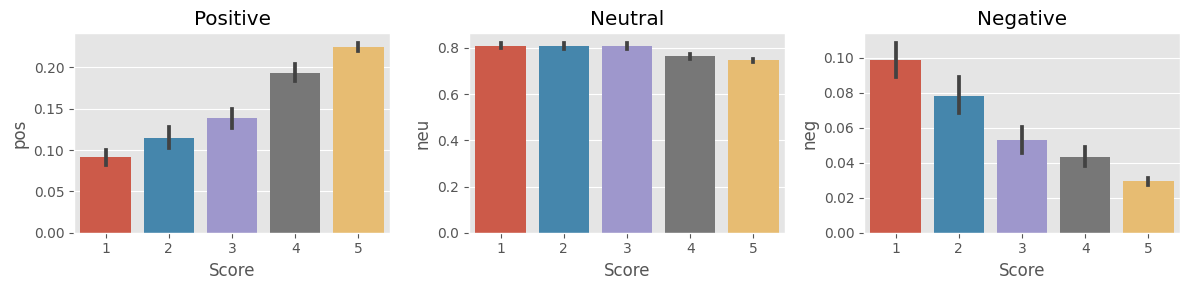

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Trying out the RoBERTa pretrained model

main features:
1. Uses a model trained of a large corpus of data.
2. Transformer model accounts for the words but also the context related to other words.

In [41]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [42]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [43]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This is a fabulous marinade!  I love to use it for chicken, either baked in the oven OR on the grill.  This has enough flavor & flair, I've even used it for dinner parties, only to receive rave reviews from my guests!! DEFINITELY worth the price! Super cheap and super easy! Love it!


{'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'compound': 0.9858}

In [57]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0016690495, 'roberta_neu': 0.016341805, 'roberta_pos': 0.98198915}


In [58]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [59]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/150 [00:00<?, ?it/s]

Broke for id 83


In [60]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

## Compare Scores between models

In [61]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

## Combine and compare

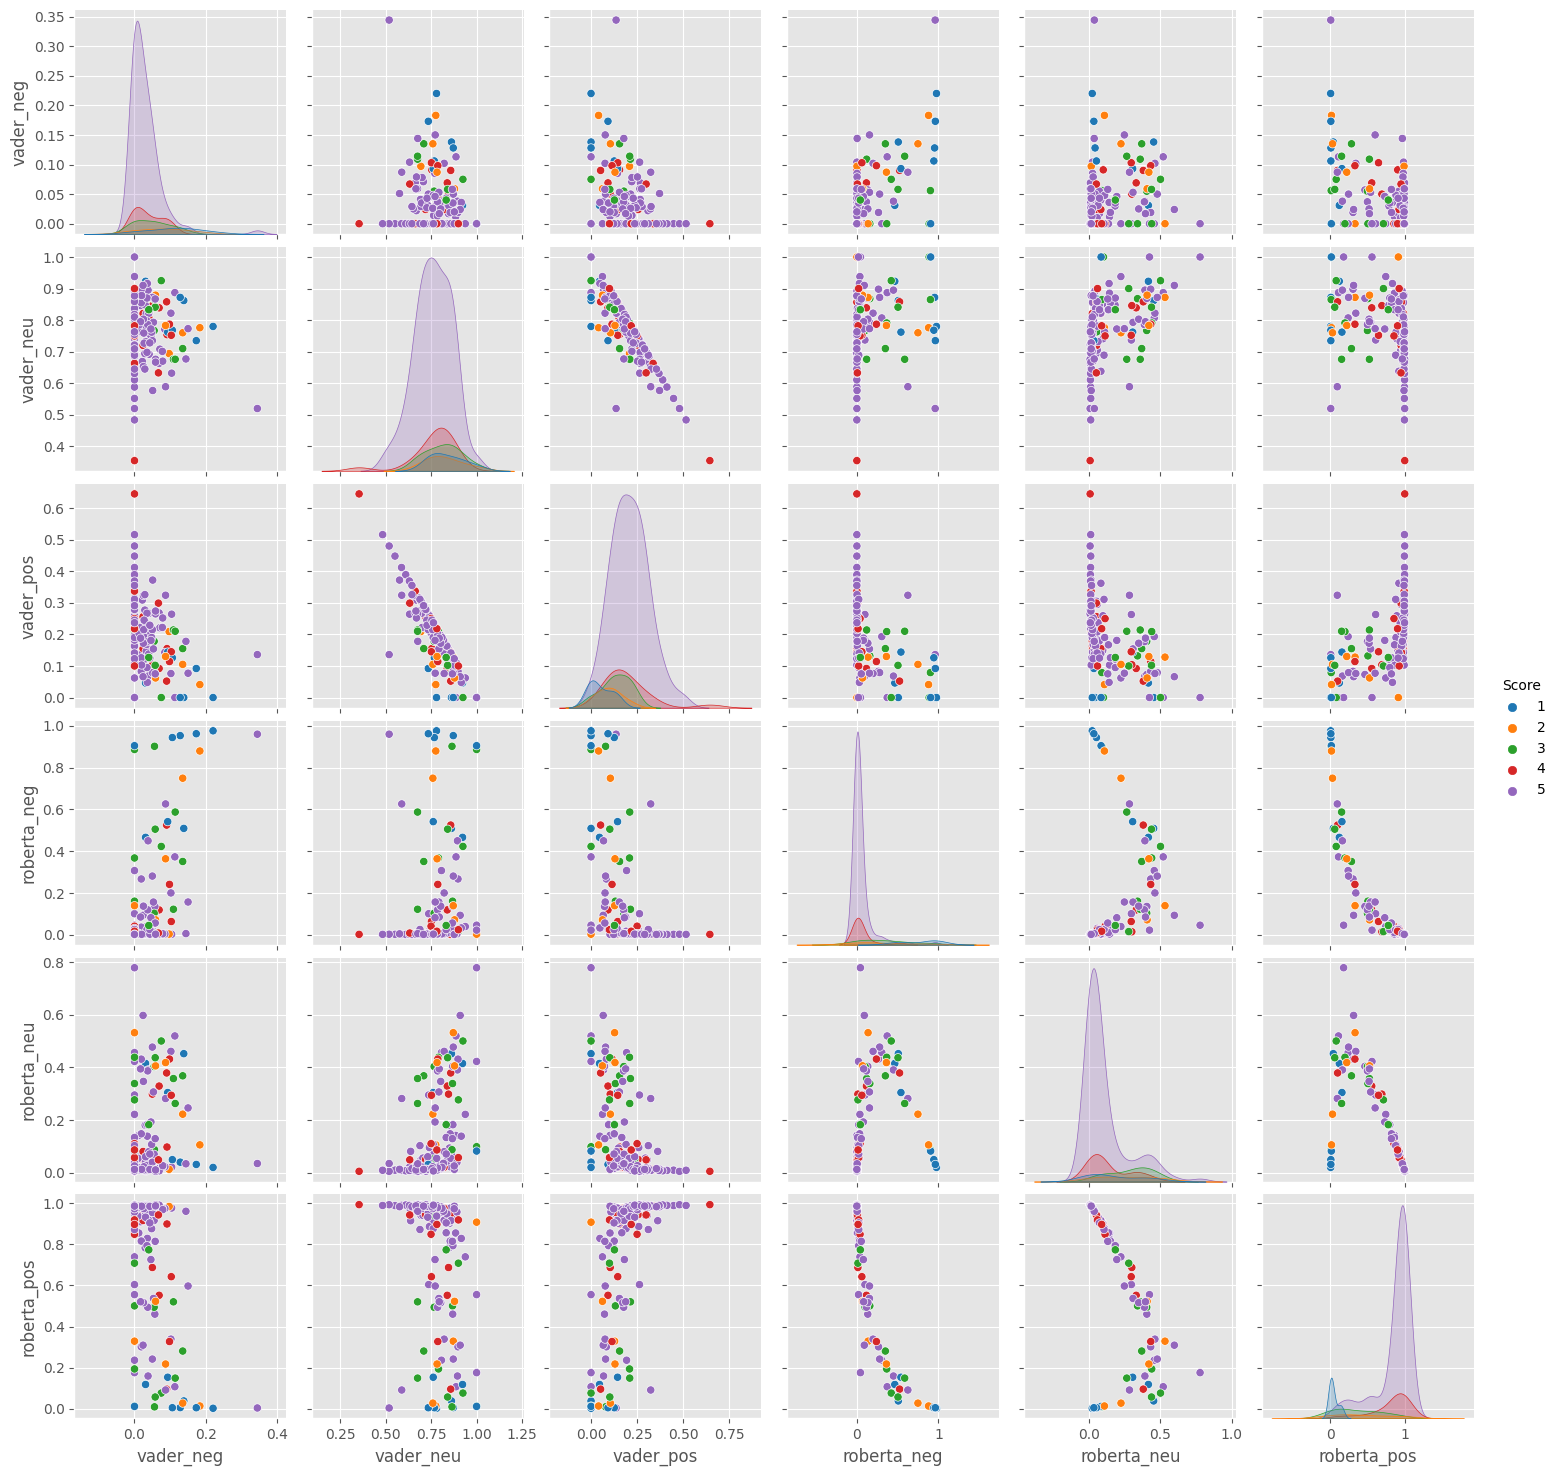

In [62]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

## Review Examples:

- Positive 1-Star and Negative 5-Star Reviews

Lets look at some examples where the model scoring and review score differ the most.

In [63]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'Buyer Beware Please! This sweetener is not for everybody.  Maltitol is an alcohol sugar and can be undigestible in the body.  You will know a short time after consuming it if you are one of the unsuspecting many who cannot digest it by the extreme intestinal bloating and cramping and massive amounts of gas a person can experience. Nausea, diarrhea & headaches can also be experienced. I learned my lesson the hard way years ago when I fell in love with the sugar-free chocolates suzanne sommers used to sell.  I thought I\'d found sugar-free chocolate nirvana at first taste but the bliss was short lived when the terrible side effects of maltitol kicked in.  The discomfort was unlike anything I had ever felt before.  I blew up like a balloon and had very painful abdominal cramping.  As the symptoms passed, this too was very unpleasant.  Though hard for me to believe a low calorie sweetener could be the culprit, all symptoms were gone when I stopped eating the chocolate. My hunch it had som

In [64]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'Buyer Beware Please! This sweetener is not for everybody.  Maltitol is an alcohol sugar and can be undigestible in the body.  You will know a short time after consuming it if you are one of the unsuspecting many who cannot digest it by the extreme intestinal bloating and cramping and massive amounts of gas a person can experience. Nausea, diarrhea & headaches can also be experienced. I learned my lesson the hard way years ago when I fell in love with the sugar-free chocolates suzanne sommers used to sell.  I thought I\'d found sugar-free chocolate nirvana at first taste but the bliss was short lived when the terrible side effects of maltitol kicked in.  The discomfort was unlike anything I had ever felt before.  I blew up like a balloon and had very painful abdominal cramping.  As the symptoms passed, this too was very unpleasant.  Though hard for me to believe a low calorie sweetener could be the culprit, all symptoms were gone when I stopped eating the chocolate. My hunch it had som

In [65]:
# negative sentiment 5-Star view

results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [66]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'


# RECAP

Sentiment analysis is the task of identifying and extracting the emotional tone or attitude of a text, such as positive, negative, or neutral. In this project, I compared two different methods for performing sentiment analysis on a dataset of movie reviews: the VADER method and the RoBERTa model.

The VADER method is a rule-based approach that uses a lexicon of words and phrases with predefined polarity scores. It also considers the intensity, negation, and context of the words to compute the overall sentiment score of a text. The RoBERTa model is a pre-trained transformer model from Hugging Face that uses a large corpus of text and a self-attention mechanism to learn the semantic representations of words and sentences. It can be fine-tuned on a specific task such as sentiment analysis using a labeled dataset.

I applied both methods to the same dataset of amazon reviews and evaluated their performance. The results showed that the RoBERTa model outperformed the VADER method on all metrics, indicating that the RoBERTa model can capture more complex and nuanced aspects of sentiment than the VADER method.

## EXTRA The Transformers Pipeline
- Quick & easy way to run sentiment predictions

In [67]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [68]:
sent_pipeline('I love StackUp!')

[{'label': 'POSITIVE', 'score': 0.9998619556427002}]

In [70]:
sent_pipeline('Make sure to like and subscribe!')

[{'label': 'POSITIVE', 'score': 0.9991742968559265}]

In [71]:
sent_pipeline('booo hoo')

[{'label': 'NEGATIVE', 'score': 0.9899937510490417}]

# The End of our Project 🤗